In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import quad


# Lecture des données
data = pd.read_csv('data3.csv')



Nous définissons la taille de la "fenêtre". 
Cela consiste à effectuer une moyenne arithmétique des voisins avant et après un certain point de données. Cela permet de réduire les erreurs causées par des bruits aléatoires.

In [2]:
# définissons la taille de la "fenêtre"
window_size_1 = 5  
window_size_2 = 5 
threshold = 0.0001  

   Time  Amplitude
0     0   38.13851
1     1   38.13886
2     2   38.13872
3     3   38.13902
4     4   38.13893
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time       242 non-null    int64  
 1   Amplitude  242 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.9 KB
None


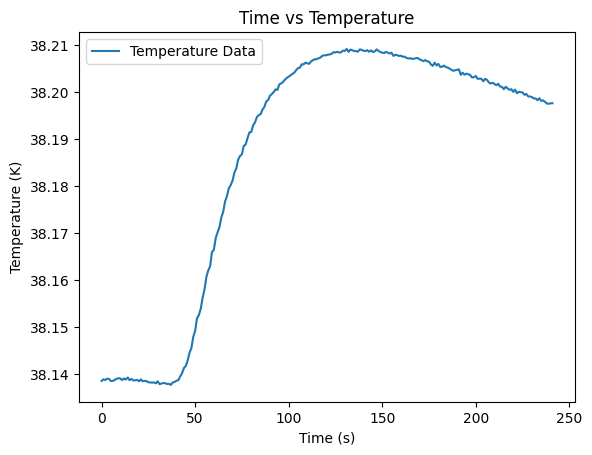

In [3]:
# Afficher les premières lignes des données pour vérifier la lecture correcte
print(data.head())

# Vérifier les informations de base des données
print(data.info())

# Tracer le graphique temps-température pour vérifier l'importation des données
plt.plot(data['Time'], data['Amplitude'], label='Temperature Data')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (K)')
plt.title('Time vs Temperature')
plt.legend()
plt.show()

In [4]:
# Créer une série de températures lissées
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

# Effectuer un premier lissage des données brutes
smoothed_temperature = moving_average(data['Amplitude'], window_size_1)

# Calculer la dérivée (taux de variation) des températures lissées
derivative = np.gradient(smoothed_temperature)

# Effectuer un second lissage des dérivées
smoothed_derivative = moving_average(derivative, window_size_2)

# Vérifier la série de températures lissées
print(smoothed_temperature[:10])  #

[38.138808 38.138808 38.13874  38.138742 38.138734 38.138766 38.13887
 38.138908 38.138972 38.138938]


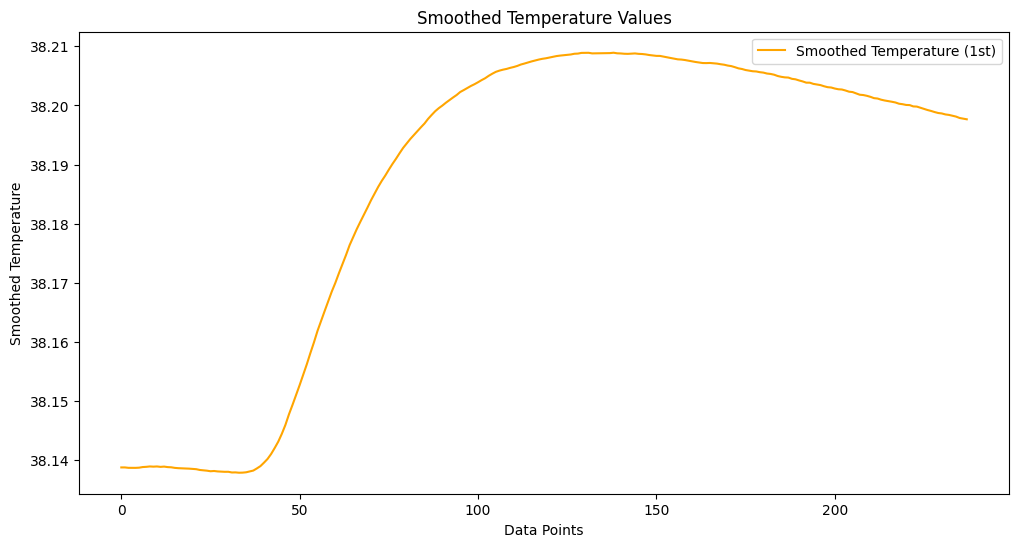

In [5]:
# Imprimer toutes les valeurs de température lissées
plt.figure(figsize=(12, 6))
plt.plot(smoothed_temperature, label='Smoothed Temperature (1st)', color='orange')
plt.xlabel('Data Points')
plt.ylabel('Smoothed Temperature')
plt.title('Smoothed Temperature Values')
plt.legend()
plt.savefig('smoothed_temperature.png')
plt.show()

In [6]:
# calculate the gradient after smoothie
derivative = np.gradient(smoothed_temperature)

# check
print(derivative[:10])  # 打印前10个导数值

[-7.10542736e-15 -3.40000000e-05 -3.30000000e-05 -3.00000000e-06
  1.20000000e-05  6.80000000e-05  7.10000000e-05  5.10000000e-05
  1.50000000e-05 -1.00000000e-06]


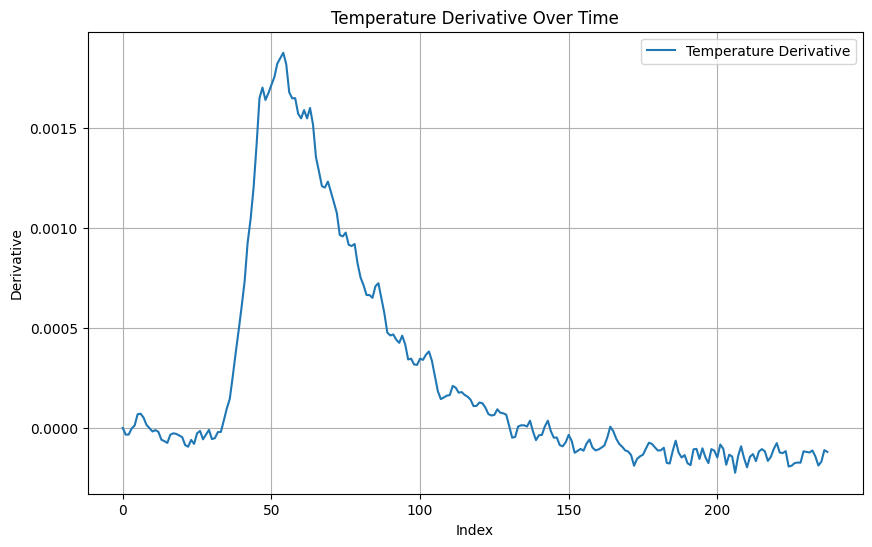

In [7]:
# draw the derivate value
plt.figure(figsize=(10, 6))
plt.plot(derivative, label='Temperature Derivative')
plt.xlabel('Index')
plt.ylabel('Derivative')
plt.title('Temperature Derivative Over Time')
plt.legend()
plt.grid(True)


plt.show()

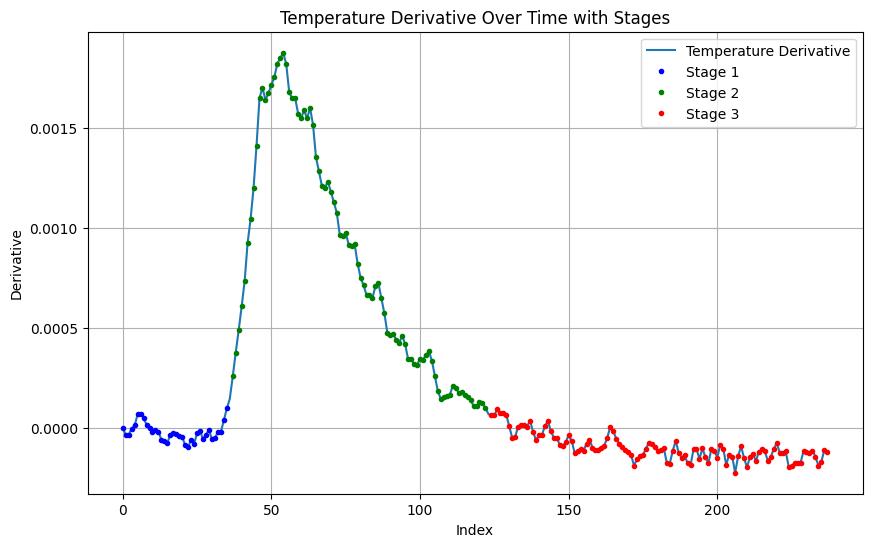

In [8]:
# initialize the array
stages = np.zeros_like(derivative)

# set a threshold for different stages:befor, during, and after heating
threshold = 0.0001

# define stage signs
current_stage = 1
#stage 1: before heating
#stage 2: heating
#stage 3: cooling
i = 0
while i < len(derivative):
    if current_stage == 1:
        if derivative[i] >= threshold:
            current_stage = 2
        else:
            stages[i] = 1
    elif current_stage == 2:
        if derivative[i] < threshold:
            current_stage = 3
        else:
            stages[i] = 2
    elif current_stage == 3:
        stages[i] = 3
    i += 1

# draw derivate and stages
plt.figure(figsize=(10, 6))
plt.plot(derivative, label='Temperature Derivative')

colors = ['blue', 'green', 'red']
for stage in range(1, 4):
    plt.plot(np.where(stages == stage)[0], derivative[stages == stage], '.', label=f'Stage {stage}', color=colors[stage-1])

plt.xlabel('Index')
plt.ylabel('Derivative')
plt.title('Temperature Derivative Over Time with Stages')
plt.legend()
plt.grid(True)


plt.show()

In [9]:
# Time axis after smoothing
time_adjusted_1 = data['Time'][window_size_1 // 2: -(window_size_1 // 2)]
time_adjusted_2 = time_adjusted_1[window_size_2 // 2: -(window_size_2 // 2)]

# cut data lenth to match the asjusted time array length
derivative = data['Time'].values[window_size_1 // 2: -(window_size_1 // 2)]
derivative = derivative[window_size_2 // 2: -(window_size_2 // 2)]
temperature = data['Amplitude'].values[window_size_1 // 2: -(window_size_1 // 2)]
temperature = temperature[window_size_2 // 2: -(window_size_2 // 2)]

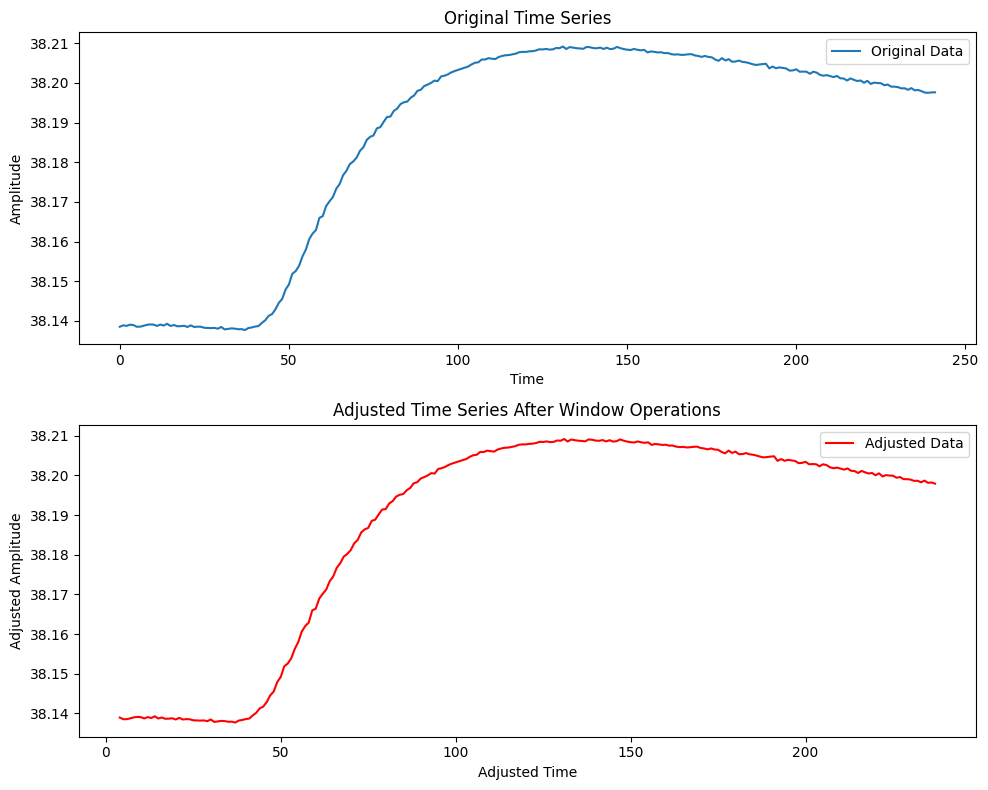

In [10]:

# a contrust 
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# original
ax[0].plot(data['Time'], data['Amplitude'], label='Original Data')
ax[0].set_title('Original Time Series')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[0].legend()

# smoothied

ax[1].plot(time_adjusted_2, temperature, label='Adjusted Data', color='r')
ax[1].set_title('Adjusted Time Series After Window Operations')
ax[1].set_xlabel('Adjusted Time')
ax[1].set_ylabel('Adjusted Amplitude')
ax[1].legend()

plt.tight_layout()
plt.show()

In [11]:
# make sure they have the same length
min_length = min(len(time_adjusted_2), len(derivative), len(temperature))
time_adjusted_2 = time_adjusted_2[:min_length]
derivative = derivative[:min_length]
temperature = temperature[:min_length]

again, make sure they have the same length

In [12]:
def compare_lengths(time_seq, der_seq, temp_seq, time_adj_seq, der_adj_seq, temp_adj_seq):
    # original length
    original_lengths = {
        'Time Sequence': len(time_seq),
        'Derivative Sequence': len(der_seq),
        'Temperature Sequence': len(temp_seq)
    }
    
    # adjusted lengths 
    adjusted_lengths = {
        'Time Adjusted': len(time_adj_seq),
        'Derivative Adjusted': len(der_adj_seq),
        'Temperature Adjusted': len(temp_adj_seq)
    }
    
    print("Original Lengths:", original_lengths)
    print("Adjusted Lengths:", adjusted_lengths)
    


#Now call the function using the example data (assuming the data has been correctly loaded)
#The code for adjusting data length should have been completed in the previous steps
#time_adjusted_2, derivative, and temperature should be the length-adjusted data

compare_lengths(data['Time'], data['Time'].values, data['Amplitude'].values, 
                time_adjusted_2, derivative, temperature)


Original Lengths: {'Time Sequence': 242, 'Derivative Sequence': 242, 'Temperature Sequence': 242}
Adjusted Lengths: {'Time Adjusted': 234, 'Derivative Adjusted': 234, 'Temperature Adjusted': 234}


Assuming the second column is 'Amplitude', depending on the specific structure of the CSV file.
If the second column has a specific column name, replace 'Amplitude' with that column name.
Retrieve the index and the values of the 'Amplitude' column.

In [13]:
amplitude_series = data.iloc[:, 1]  
index_amplitude_pairs = amplitude_series.reset_index()

# 打印索引和Amplitude的前几个配对，以查看数据
print(index_amplitude_pairs.head())


   index  Amplitude
0      0   38.13851
1      1   38.13886
2      2   38.13872
3      3   38.13902
4      4   38.13893


In [14]:
amplitude_data = data['Amplitude'].values[:len(stages)]

# Now use the stages array to index the truncated amplitude_data
stage1_data = amplitude_data[stages == 1]
stage2_data = amplitude_data[stages == 2]
stage3_data = amplitude_data[stages == 3]

# Organize the 2D array as a list:
stages_amplitude = [stage1_data, stage2_data, stage3_data]

# Output the length and sample of Amplitude data for each stage
for idx, stage_data in enumerate(stages_amplitude, 1):
    print(f"Stage {idx} Data Length: {len(stage_data)}")
    print(f"Stage {idx} Data Sample (first 5 elements): {stage_data[:5]}")

Stage 1 Data Length: 36
Stage 1 Data Sample (first 5 elements): [38.13851 38.13886 38.13872 38.13902 38.13893]
Stage 2 Data Length: 86
Stage 2 Data Sample (first 5 elements): [38.13767 38.13817 38.13832 38.13855 38.13867]
Stage 3 Data Length: 114
Stage 3 Data Sample (first 5 elements): [38.20849 38.20844 38.20858 38.20841 38.20847]


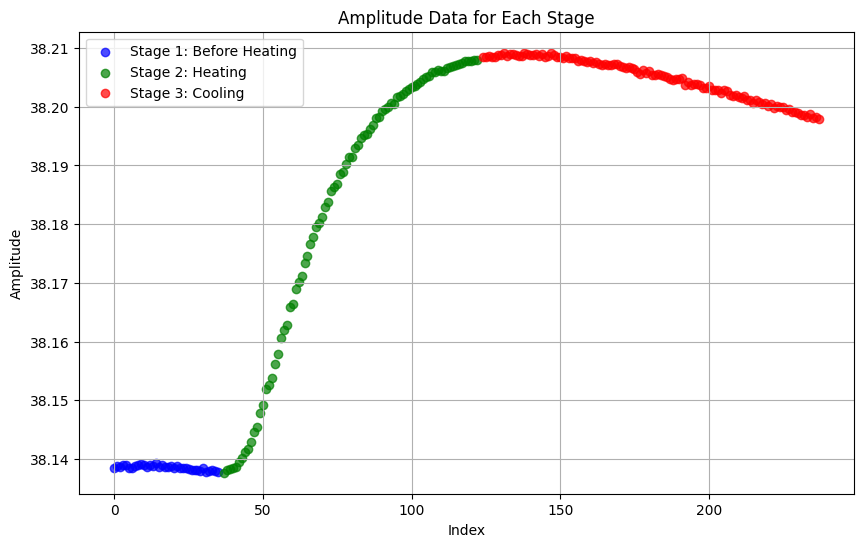

In [15]:
# 绘制各阶段的Amplitude数据
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red']  # 分别对应 stage 1, stage 2, stage 3 的颜色
labels = ['Stage 1: Before Heating', 'Stage 2: Heating', 'Stage 3: Cooling']

# 绘制每个阶段的数据
for idx, (stage_data, color, label) in enumerate(zip(stages_amplitude, colors, labels), 1):
    indices = np.where(stages == idx)[0]  # 获取当前阶段的索引
    plt.scatter(indices, stage_data, color=color, label=label, alpha=0.7)  # 使用散点图表示

plt.title('Amplitude Data for Each Stage')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
# 定义线性拟合函数
def linear_fit(x, a, b):
    return a * x + b

# 定义指数衰减函数
def exp_decay(x, c, d, e):
    return c * np.exp(-d * x) + e


In [17]:
# 获取各阶段数据索引和Amplitude值
stage2_indices = np.where(stages == 2)[0]
stage3_indices = np.where(stages == 3)[0]
stage2_data = amplitude_data[stages == 2]
stage3_data = amplitude_data[stages == 3]

# 对 stage 2 使用线性模型进行拟合
linear_params, _ = curve_fit(linear_fit, stage2_indices, stage2_data)

# 对 stage 3 使用指数衰减模型进行拟合
# 提供更接近可能的合理初始参数
initial_guess = [np.max(stage3_data), 0.001, np.min(stage3_data)]
try:
    exp_params, _ = curve_fit(exp_decay, stage3_indices, stage3_data, p0=initial_guess, maxfev=5000)
    fit_success = True
except RuntimeError as e:
    print("Fit error:", e)
    fit_success = False



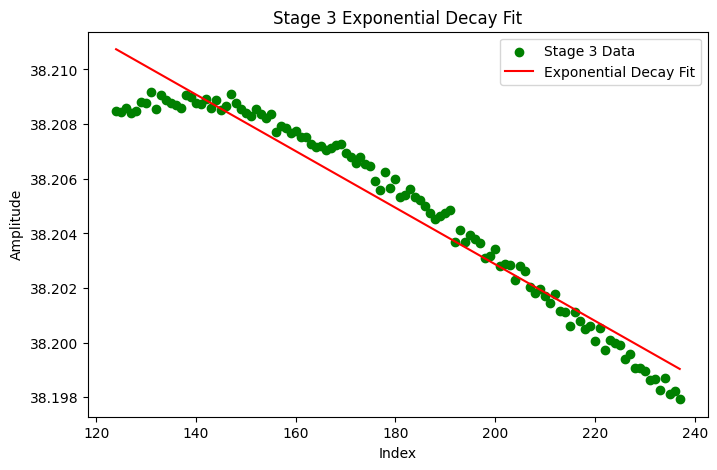

In [18]:
#尝试为降温阶段绘制拟合函数

# 如果拟合成功，绘制结果
if fit_success:
    plt.figure(figsize=(8, 5))
    plt.scatter(stage3_indices, stage3_data, color='green', label='Stage 3 Data')
    plt.plot(stage3_indices, exp_decay(stage3_indices, *exp_params), color='red', label='Exponential Decay Fit')
    plt.title('Stage 3 Exponential Decay Fit')
    plt.xlabel('Index')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()
else:
    print("Unable to fit the exponential decay model to the data.")

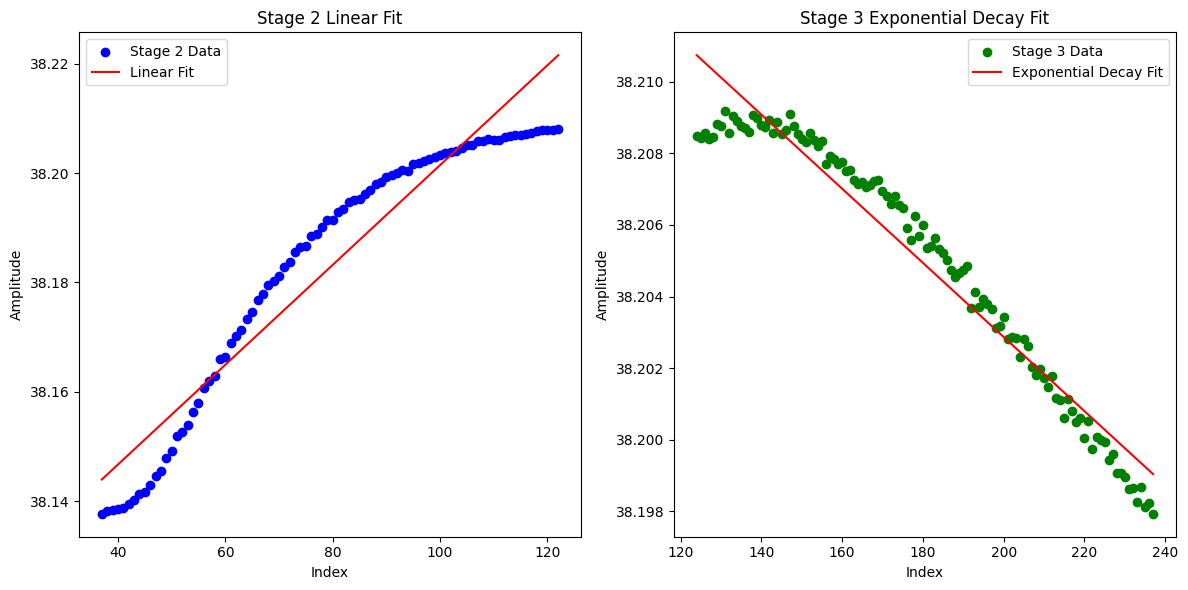

In [19]:
# 绘制拟合结果
plt.figure(figsize=(12, 6))

# Stage 2 Linear Fit
plt.subplot(1, 2, 1)
plt.scatter(stage2_indices, stage2_data, color='blue', label='Stage 2 Data')
plt.plot(stage2_indices, linear_fit(stage2_indices, *linear_params), color='red', label='Linear Fit')
plt.title('Stage 2 Linear Fit')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.legend()

# Stage 3 Exponential Decay Fit
plt.subplot(1, 2, 2)
plt.scatter(stage3_indices, stage3_data, color='green', label='Stage 3 Data')
plt.plot(stage3_indices, exp_decay(stage3_indices, *exp_params), color='red', label='Exponential Decay Fit')
plt.title('Stage 3 Exponential Decay Fit')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

首先我们将index转化为second，并且重新绘制图片

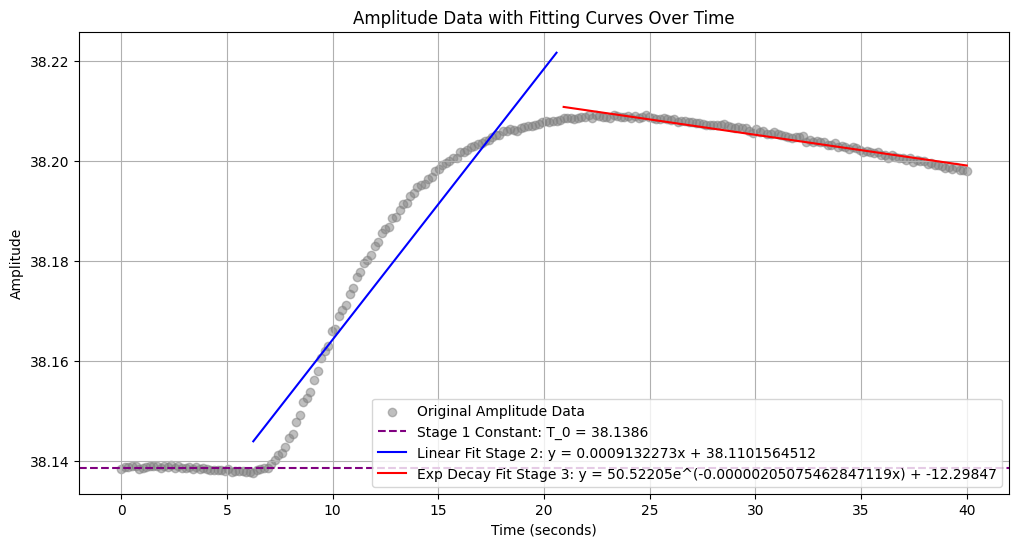

In [20]:
# 总时间（秒），这里你需要提供具体的总时间
total_time = 40 # 例如，1200秒

# 创建时间数组（以秒为单位）
time_seconds = np.linspace(0, total_time, len(amplitude_data))

# 计算 Stage 1 的平均Amplitude作为 T_0
stage1_indices = np.where(stages == 1)[0]
stage1_data = amplitude_data[stages == 1]
T_0 = np.mean(stage1_data)  # 使用平均值作为常数 T_0

# 通过拟合获得的参数更新图表
plt.figure(figsize=(12, 6))

# 绘制原始Amplitude数据
plt.scatter(time_seconds, amplitude_data, color='gray', label='Original Amplitude Data', alpha=0.5)

# 绘制 Stage 1 常数线 T_0
plt.axhline(y=T_0, color='purple', linestyle='--', label=f'Stage 1 Constant: T_0 = {T_0:.4f}')

# Stage 2 Linear Fit
if 'linear_params' in locals():  # 检查是否有Stage 2的拟合参数
    plt.plot(time_seconds[stage2_indices], linear_fit(stage2_indices, *linear_params), 
             color='blue', label=f'Linear Fit Stage 2: y = {linear_params[0]:.10f}x + {linear_params[1]:.10f}')

# Stage 3 Exponential Decay Fit
if 'exp_params' in locals() and fit_success:  # 检查是否有Stage 3的拟合参数且拟合成功
    plt.plot(time_seconds[stage3_indices], exp_decay(stage3_indices, *exp_params), 
             color='red', label=f'Exp Decay Fit Stage 3: y = {exp_params[0]:.5f}e^(-{exp_params[1]:.20f}x) + {exp_params[2]:.5f}')

plt.title('Amplitude Data with Fitting Curves Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

总之上面是某种拟合。

获取两个函数的参数

In [21]:
print(linear_params)#stage 2的线性函数

[9.13227320e-04 3.81101565e+01]


In [22]:
print(exp_params)#stage 3的指数函数

[ 5.05220530e+01  2.05075463e-06 -1.22984653e+01]


In [23]:
print(time_seconds[stage2_indices][0])

6.244725738396625


In [24]:
print(time_seconds[stage2_indices][..., -1])

20.59071729957806


In [25]:
print(time_seconds[stage3_indices][0])

20.928270042194093


In [26]:
print(time_seconds[stage3_indices][..., -1])

40.0


## 4 - Méthode de l'égalité des aires

La difficulté pour calculer C est de connaître le $ΔT$ que l'on aurait dû avoir en l'absence de pertes. En effet, la quantité $(T_1 - T_0)$ n'est pas égale au vrai $ΔT$ car une partie de l'énergie fournie a été absorbée par la source froide.

Pour obtenir le vrai ΔT, extrapolons la partie BED de la courbe pour t < t1 et supposons connus les points G et H tels que l'aire GHD (A3) soit égale à l'aire ABD (A1 + A2). Ces points correspondent au temps t3 et à la température T3.

$$
A_3=\int_{\mathrm{t}_3}^{\infty}\left(\mathrm{T}_1-\mathrm{T}_0\right) \mathrm{e}^{-\frac{\mathrm{K}}{\mathrm{c}}\left(\mathrm{t}-\mathrm{t}_1\right)} \mathrm{dt}
$$


In [27]:
import numpy as np
from scipy.optimize import fsolve

In [28]:
# 定义新的函数来计算线性拟合结果
def linear_fit_result(t):
    a, b = linear_params
    return a * t + b

# 定义新的函数来计算指数衰减拟合结果
def exp_decay_result(t):
    a, b, c = exp_params
    return a * np.exp(-b * t) + c

# 定义积分函数
def linear_integral(t0, x):
    a, b = linear_params
    return (a / 2) * (x**2 - t0**2) + b * (x - t0)

def exp_integral(x, t1):
    a, b, c = exp_params
    return (-a / b) * (np.exp(-b * t1) - np.exp(-b * x)) + c * (t1 - x)


In [29]:
t0=time_seconds[stage2_indices][0]
t1=time_seconds[stage2_indices][..., -1]
print(t0,t1)

6.244725738396625 20.59071729957806


In [30]:
# 定义目标函数
def target_function(x):
    return linear_integral(t0, x) - exp_integral(x, t1)

# 初始猜测值
x_initial_guess = (t0 + t1) / 2

# 使用fsolve求解
solution = fsolve(target_function, x_initial_guess)

# 打印结果
x_solution = solution[0]
print(f"Solution for x: {x_solution:.5f}")

# 验证积分值
linear_int_value = linear_integral(t0, x_solution)
exp_int_value = exp_integral(x_solution, t1)
print(f"Integral of linear function from {t0} to {x_solution:.5f}: {linear_int_value:.5f}")
print(f"Integral of exponential function from {x_solution:.5f} to {t1}: {exp_int_value:.5f}")

Solution for x: 13.42737
Integral of linear function from 6.244725738396625 to 13.42737: 273.79621
Integral of exponential function from 13.42737 to 20.59071729957806: 273.79621


In [31]:
print(amplitude_data[stages == 3][0])

38.20849


Évaluons les aires ABC (A1) et BCD (A2).

$$
\begin{aligned}
& A_1=\int_0^1 \frac{\mathrm{P}}{\mathrm{K}}\left(1-\mathrm{e}^{-\frac{\mathrm{K}}{\mathrm{C}}}\right) \mathrm{dt}=\frac{\mathrm{Pt}_1}{\mathrm{~K}}-\frac{\mathrm{C}}{\mathrm{K}}\left(\mathrm{T}_1-\mathrm{T}_0\right) \\
& A_2=\int_{\mathrm{t}_1}^{\infty}\left(\mathrm{T}_1-\mathrm{T}_0\right) \mathrm{e}^{-\frac{\mathrm{K}}{\mathrm{C}}\left(\mathrm{t}-\mathrm{t}_1\right)} \mathrm{dt}=\frac{\mathrm{C}}{\mathrm{K}}\left(\mathrm{T}_1-\mathrm{T}_0\right)
\end{aligned}
$$

L'aire ABD ($A = A_1 + A_2$) est donc proportionnelle à $P·t1$, c'est-à-dire à $Q$ fournie à l'échantillon.

$$
A = A1 + A2 = \frac{P t_1}{K}=\frac{Q}{K}
$$

On peut alors déduire la chaleur spécifique en combinant (4) et (5) de façon à éliminer K :

$$
\mathrm{C}=\mathrm{Pt}_1 * \frac{1}{\mathrm{~T}_1-\mathrm{T}_0} * \frac{A_2}{A_1+A_2}
$$

Cette méthode est peu commode car elle nécessite la mesure des aires A1 et A2.


In [32]:
Energie = 2.64
T_1=amplitude_data[stages == 3][0]
Facteur_1 = 1/(T_1-T_0)
print(Facteur_1)

14.299957497349789


In [33]:
A_1 = linear_integral(t0, t1)
A_2 = exp_integral(t1, 50)#500 signifie infinie
Facteur_2=A_2/(A_1+A_2)
print(A_1, A_2, Facteur_2)

546.9037704460991 1124.0207522853523 0.6726939110618363


In [34]:
Chaleur_specifique = Energie * Facteur_1 *Facteur_2
print(Chaleur_specifique)

25.395465049443086
